In [1]:
import tensorflow as tf
#Vers. 0.12.1
#print(tf.__version__)
import sys
#Should be above 3.5
#print (sys.version)     

import cv2
import numpy as np
import os
import glob
import pickle

import matplotlib.image as mpimg
from skimage import color

import random

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

from Helpers import get_files, load_image, separate_imgs, get_next_batch_from_disk, get_next_batch_from_disk2

# Colorize

In [2]:
def colorize_TF(gray_images):
    with tf.Session() as sess:
        model_path = "./test/model.ckpt"
        save_dir = 'test'

        new_saver = tf.train.import_meta_graph(save_dir + "/model.ckpt.meta")
        new_saver.restore(sess, save_dir + '/model.ckpt')

        # tf.get_collection() returns a list. In this example we only want the
        # first one.
        colored_images = tf.get_collection('color_image')[0]

        images = np.array(gray_images)
        
        return sess.run(colored_images, feed_dict={"x:0": images})

In [3]:
images_list = get_files("..\Data\Images\\*", '*.jpg')
batch_size = 8

v, hs = get_next_batch_from_disk2(images_list, batch_size)

colored = colorize_TF(v)

#a,b = np.split(colored[0], 2, axis=2)
#coloried
    
#plt.imshow(colored[1])

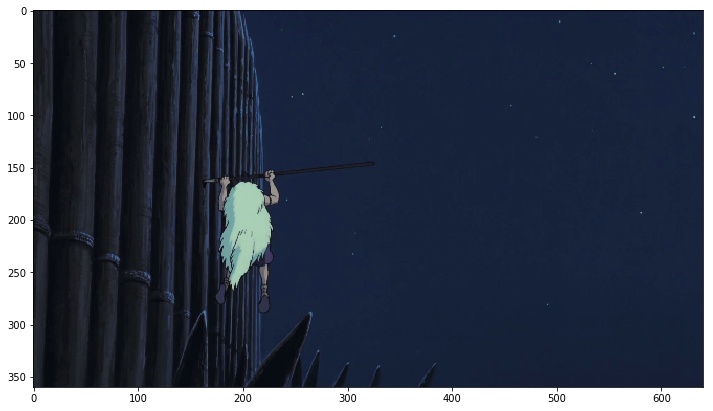

In [4]:
v_correct = v[0][..., 0]
h_correct = hs[0][..., 0] 
s_correct = hs[0][..., 1]

recons = np.empty(shape=[360,640,3])

recons[..., 0] = h_correct
recons[..., 1] = s_correct
recons[..., 2] = v_correct

img_rgb = color.hsv2rgb(recons)
r = img_rgb[..., 2]
g = img_rgb[..., 1]
b = img_rgb[..., 0]

plt.imshow(np.dstack((r,g,b)))

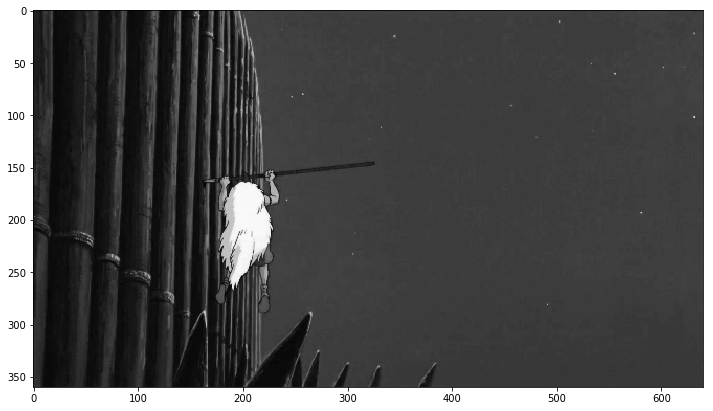

In [5]:
plt.imshow(v_correct, cmap="gray")

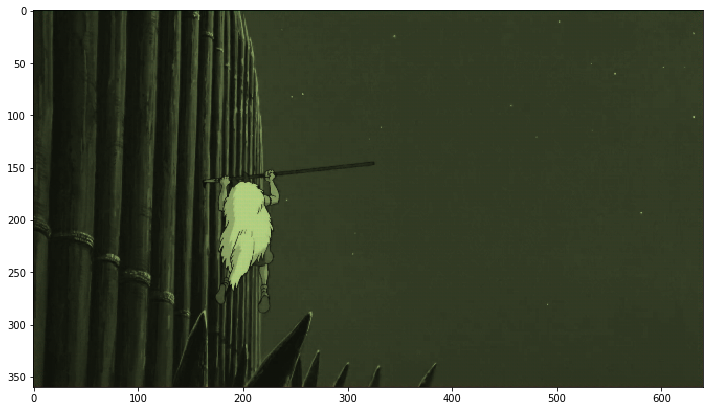

In [6]:
v_result = v[0][..., 0]
h_result = colored[0][..., 0] 
s_result = colored[0][..., 1]

recons = np.empty(shape=[360, 640, 3])

recons[...,0] = h_result#.astype(np.float64)
recons[...,1] = s_result#.astype(np.float64)
recons[...,2] = v_result#.astype(np.float64)
#reconstruct_im = np.array((h, s , v)).reshape( (360,640,3) )

img_rgb = color.hsv2rgb(recons)
r = img_rgb[..., 2]
g = img_rgb[..., 1]
b = img_rgb[..., 0]

plt.imshow(np.dstack((r,g,b)))